<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* pandas functions 
* dt
* pd snippets

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
from plotnine import ggplot, aes
import plotnine as gg

# pandas functions

In [3]:
list_file = [f'players_{a:02}.csv' for a in range(15,22)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27.0,1987-06-24,169.0,67.0,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29.0,1985-02-05,185.0,80.0,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30.0,1984-01-23,180.0,80.0,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32.0,1981-10-03,195.0,95.0,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28.0,1986-03-27,193.0,92.0,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [6]:
top_nans = pd.DataFrame(d1.isnull().sum()[d1.isnull().sum() !=0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
loaned_from,102837
nation_position,102077
nation_jersey_number,102077


In [8]:
d1[top_nans.index].fillna(d1.mode().iloc[0,0]).head()

,loaned_from,nation_position,nation_jersey_number
0,41.0,CF,10.0
1,41.0,LW,7.0
2,41.0,RS,11.0
3,41.0,ST,10.0
4,41.0,GK,1.0


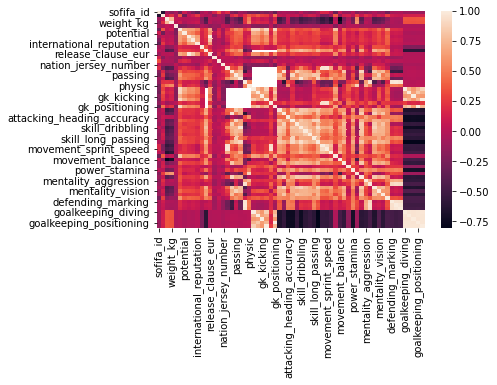

In [9]:
sns.heatmap(d1.corr())

# dt

In [10]:
d2  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d2.purchase_date = pd.to_datetime(d2.purchase_date)
d2

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [11]:
d2.assign(month = d2.purchase_date.to_numpy().astype('datetime64[M]'))

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [16]:
d2.assign(month = d2.purchase_date.dt.to_period('M').dt.to_timestamp())

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [18]:
d2.assign(month = d2.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


# pd snippets

In [30]:
pd.read_csv('pivot.csv', usecols = ['month', 'permit']).head()

,month,permit
0,2020-04-30,21276.0
1,2020-04-30,85.0
2,2020-04-30,24460.0
3,2020-04-30,5074.0
4,2020-04-30,280.0


In [33]:
t1 = pd.read_csv('pivot.csv', parse_dates = ['month'])
t1.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [34]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     object        
 2   permit  19 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.0+ bytes


In [52]:
pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'state' : str}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     object        
 2   permit  19 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.0+ bytes


In [53]:
pd.read_csv('pivot.csv', index_col = 'month').head()

,state,permit
month,,
2020-04-30,Alabama,21276.0
2020-04-30,Alaska,85.0
2020-04-30,California,24460.0
2020-04-30,Massachusetts,5074.0
2020-04-30,North Dakota,280.0


In [54]:
pd.read_csv('pivot.csv', nrows = 5)

,month,state,permit
0,2020-04-30,Alabama,21276
1,2020-04-30,Alaska,85
2,2020-04-30,California,24460
3,2020-04-30,Massachusetts,5074
4,2020-04-30,North Dakota,280


In [56]:
pd.read_csv('pivot.csv', skiprows = lambda x : x>2)

,month,state,permit
0,2020-04-30,Alabama,21276
1,2020-04-30,Alaska,85


In [63]:
pd.read_csv('pivot.csv', na_values = [0.0]).fillna(0).head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [65]:
d5 = pd.read_csv('pivot.csv', parse_dates = ['month'])
d5.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [70]:
d5.select_dtypes(include = 'number').head()

,permit
0,21276.0
1,85.0
2,24460.0
3,5074.0
4,280.0


In [73]:
d5.select_dtypes(include = ['datetime', 'object']).head()

,month,state
0,2020-04-30,Alabama
1,2020-04-30,Alaska
2,2020-04-30,California
3,2020-04-30,Massachusetts
4,2020-04-30,North Dakota


In [76]:
d5.info(),pd.to_numeric(d5.permit, downcast = 'integer').fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     object        
 2   permit  19 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.0+ bytes


(None, 0     21276.0
 1        85.0
 2     24460.0
 3      5074.0
 4       280.0
 5     31205.0
 6       143.0
 7     27792.0
 8         0.0
 9       587.0
 10    29633.0
 11      139.0
 12    32002.0
 13     9173.0
 14      396.0
 15    37140.0
 16      223.0
 17    34694.0
 18     9289.0
 19      370.0
 Name: permit, dtype: float64)

In [81]:
pd.concat([d5.add_prefix('^^_').head(), d5.add_suffix('_-_-')], axis = 0).head()

,^^_month,^^_state,^^_permit,month_-_-,state_-_-,permit_-_-
0,2020-04-30,Alabama,21276.0,NaT,NaN,NaN
1,2020-04-30,Alaska,85.0,NaT,NaN,NaN
2,2020-04-30,California,24460.0,NaT,NaN,NaN
3,2020-04-30,Massachusetts,5074.0,NaT,NaN,NaN
4,2020-04-30,North Dakota,280.0,NaT,NaN,NaN


In [112]:
import string
import re
from itertools import repeat
l1 = list(string.ascii_lowercase)

In [91]:
wows = np.r_[l1, np.arange(10).astype(str)]
wows

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U21')

In [108]:
a1 = [''.join(np.random.choice(wows, 10, replace = True)) for a in range(10)]
a2 = [''.join(np.random.choice(wows, 10, replace = True)) for a in range(10)]
a3 = np.random.choice(['com', 'net', 'io'], 10, replace = True)

In [111]:
e = pd.DataFrame({'email' : [f'{a}@{b}.{c}' for a, b, c in zip(a1, a2, a3)]})
e

,email
0,kyawfhhx4c@is31xj02x0.com
1,e963fu5za4@dijl8wbtbd.com
2,plyzbb4nzk@8ruar01obs.net
3,ybo7t12r0x@pedikkejqe.io
4,ysbpg7plti@g09v1z9x9e.com
5,4vhgy4kr30@enhplxus1g.com
6,jiyp3v2tn9@7fqmvf1u8z.com
7,1qtz9e917p@kson5o89y0.io
8,ir6cigihhg@58lziepgkc.io
9,4t9hopr1eh@kulaend5it.com


In [122]:
d5['permit'].idxmin(), d5['permit'].idxmax()

(1, 15)

In [126]:
d5['permit'].apply(lambda x : np.log(x)).head()

0     9.965335
1     4.442651
2    10.104794
3     8.531885
4     5.634790
Name: permit, dtype: float64

In [129]:
d5.memory_usage().sum()/(1024**2)

0.000579833984375